In [1]:
%matplotlib widget

import pickle
from IPython import display
from base64 import b64decode
from pacti.terms.polyhedra import *
from pacti.utils import read_contracts_from_file
from contract_utils import *
import numpy as np
from matplotlib.figure import Figure
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

tuple2float = tuple[float, float]

from generators import *
from plot_utils import *

In [2]:
f20 = open('data/results20.data', 'rb')
results20 = pickle.load(f20)
f20.close()

In [3]:
def plot_results20(index:int, var:str) -> Figure:
    scenario_op = results20[index][2].merge(results20[index][3])
    bounds=[scenario_op.get_variable_bounds(f"{var}1_entry")]
    labels=["initial"]
    n=20
    for i in range(1,n):
        bounds+=[scenario_op.get_variable_bounds(f"output_{var}{i}")]
        labels+=[f"{i}"]
    bounds+=[scenario_op.get_variable_bounds(f"output_{var}{n}")]
    labels+=[f"final"]
    return plot_steps(bounds, labels, ylabel=var, title=f"Possible values of {var} over the sequence")

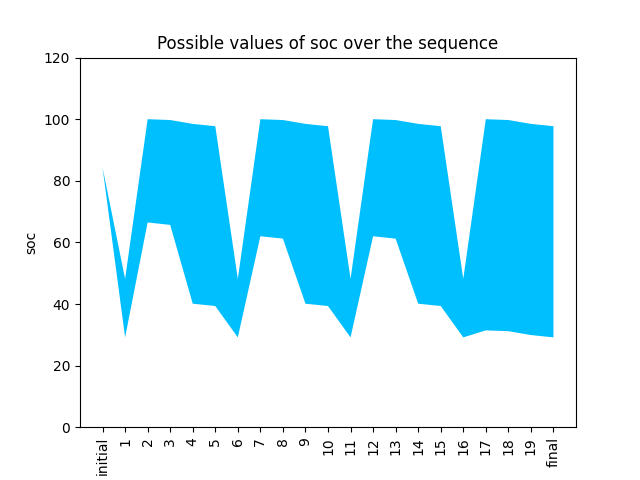

In [4]:
for i in range(0, len(results20)):
    pp = PdfPages(f"figures/results20-{i}-soc.pdf")
    fig=plot_results20(index=i, var="soc")
    pp.savefig()
    pp.close()